# Proyección en los $n$ componentes principales

En este cuaderno veremos el modo de utilizar PCA

---
    [ES] Código de Alfredo Cuesta Infante para 'Reconocimiento de Patrones'
       @ Master Universitario en Visión Artificial, 2024, URJC (España)
    [EN] Code by Alfredo Cuesta-Infante for 'Pattern Recognition'
       @ Master of Computer Vision, 2024, URJC (Spain)

    alfredo.cuesta@urjc.es

## 0. Imports & cargado de datos

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

file_path = "../datasets/breast_cancer_winsconsin_dataset/"
file_name = "train_X.csv"
X_init = pd.read_csv(file_path+file_name, sep = ';', decimal = '.', index_col=0)
file_name = "train_Y.csv"
Y_init = pd.read_csv(file_path+file_name, sep = ';', decimal = '.', index_col=0)
Y_color = Y_init.replace(['M','B'],['r','b']).values.ravel() #<- this is for plotting
#------------------------------------
X_init.head()

,feat.1_1,feat.2_1,feat.3_1,feat.4_1,feat.5_1,feat.6_1,feat.7_1,feat.8_1,feat.9_1,feat.10_1,...,feat.1_3,feat.2_3,feat.3_3,feat.4_3,feat.5_3,feat.6_3,feat.7_3,feat.8_3,feat.9_3,feat.10_3
id,,,,,,,,,,,,,,,,,,,,,
130,12.19,13.29,79.08,455.8,0.10660,0.09509,0.02855,0.02882,0.1880,0.06471,...,13.34,17.81,91.38,545.2,0.1427,0.25850,0.09915,0.08187,0.3469,0.09241
73,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,0.06566,...,16.57,20.86,110.30,812.4,0.1411,0.35420,0.27790,0.13830,0.2589,0.10300
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
471,12.04,28.14,76.85,449.9,0.08752,0.06000,0.02367,0.02377,0.1854,0.05698,...,13.60,33.33,87.24,567.6,0.1041,0.09726,0.05524,0.05547,0.2404,0.06639
216,11.89,18.35,77.32,432.2,0.09363,0.11540,0.06636,0.03142,0.1967,0.06314,...,13.25,27.10,86.20,531.2,0.1405,0.30460,0.28060,0.11380,0.3397,0.08365


## 1. PCA con $D=2~$ y $~d=\{1,2\}$

- Con los ejemplos en un espacio 2D realmente no hace mucha falta PCA.<br>
  Pero nos sirve para mostrar que:
  1. Los componentes principales conforman una nueva base donde los ejemplos se representan con otras coordenadas.
  1. Es posible reconstruir completamente el conjunto de ejemplos a partir de todos los componentes principales.
- Además se da la opción de realizar diferentes transformaciones de escalado sobre los ejemplos para ver como afectan a PCA.


### 1.1. Preselección de características

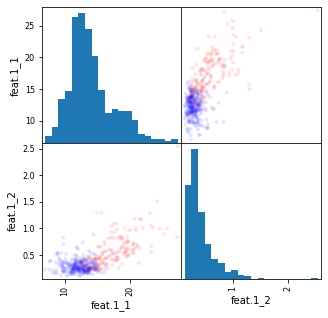

In [2]:
cols_idx = [0,10] #<-- select two columns (or just put the names in 'cols' and comment this line)
cols  = X_init.columns[cols_idx] 
X_sel = X_init[cols] 

spm = pd.plotting.scatter_matrix(X_sel, c=Y_color, figsize=(5, 5), marker='.',
                                 hist_kwds={'bins': 20}, s=60, alpha=.1)

### 1.2. Estandarización de los datos

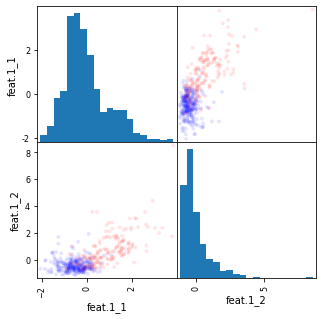

In [3]:
flag_scale = 'standard' # 'standard', 'noMean', 'unit' , otherwise is 'none'='init'

if flag_scale == 'standard' : #<- mean=0, std=1
    std_scaler  = StandardScaler().set_output(transform="pandas")    
    std_scaler.fit(X_sel)
    X_scl = std_scaler.transform(X_sel)
elif flag_scale == 'noMean':  #<- mean=0
    X_scl =(X_sel - X_sel.mean())
elif flag_scale == 'unit':    #<- linear scaled to the unit interval 
    unit_scaler = MinMaxScaler().set_output(transform="pandas")
    unit_scaler.fit(X_sel)
    X_scl = unit_scaler.transform(X_sel)
else:
    X_scl = X_sel
    
spm = pd.plotting.scatter_matrix(X_scl, c=Y_color, figsize=(5, 5), marker='.',
                                 hist_kwds={'bins': 20}, s=60, alpha=.1)

### 1.3. Análisis de componentes principales

['pc1', 'pc2']


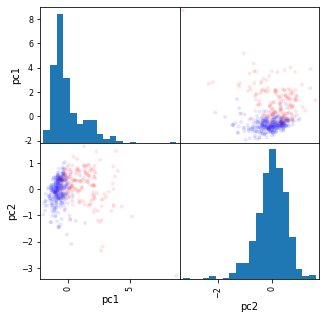

In [4]:
d = 2  #  1  ,  2

col_names = ['pc%d'%(col+1) for col in range(d)]
print(col_names)

pca = PCA(n_components=d)
pca.fit(X_scl)
X_pca = pd.DataFrame(pca.transform(X_scl), columns=col_names)

spm = pd.plotting.scatter_matrix(X_pca, c=Y_color, figsize=(5, 5), marker='.',
                                 hist_kwds={'bins': 20}, s=60, alpha=.1)

In [5]:
pca.__dict__

{'n_components': 2,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'feature_names_in_': array(['feat.1_1', 'feat.1_2'], dtype=object),
 'n_features_in_': 2,
 '_fit_svd_solver': 'covariance_eigh',
 'mean_': array([ 3.90408097e-18, -1.17122429e-16]),
 'noise_variance_': 0.0,
 'n_samples_': 455,
 'n_components_': 2,
 'components_': array([[ 0.70710678,  0.70710678],
        [ 0.70710678, -0.70710678]]),
 'explained_variance_': array([1.6786095 , 0.32579578]),
 'explained_variance_ratio_': array([0.83746013, 0.16253987]),
 'singular_values_': array([27.60595432, 12.16187839])}

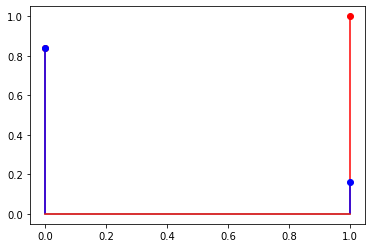

In [6]:
plt.stem(np.cumsum(pca.explained_variance_ratio_),'r')
plt.stem(pca.explained_variance_ratio_,'xb')
plt.show()

## 2. PCA con $D \gg 2~$ y $~d<D$

Ahora el espacio donde viven los ejemplos es multidimensional y por tanto la utilidad de PCA se aprecia más.

In [7]:
n_components = 6

cols_idx = range(0,30) #<-- select two columns (or just put the names in 'cols' and comment this line)
cols  = X_init.columns[cols_idx] 
X_sel = X_init[cols] 

std_scaler  = StandardScaler().set_output(transform="pandas")    
std_scaler.fit(X_sel)
X_scl = std_scaler.transform(X_sel)

pca = PCA(n_components = n_components)
pca.fit(X_scl)

X_pca = pd.DataFrame(pca.transform(X_scl))
col_names = ['pc%s'%col for col in X_pca.columns]
X_pca.columns=col_names
X_pca

,pc0,pc1,pc2,pc3,pc4,pc5
0,-1.936025,1.488148,-1.181038,-1.695616,-0.591052,0.579397
1,-0.344095,0.096515,-2.025872,-0.695943,0.960279,-0.995863
2,9.346395,2.032042,-1.001234,-3.792418,-0.873322,1.575496
3,-1.981702,-0.978597,3.093410,2.472968,-1.593153,0.267093
4,-0.456089,2.319834,0.745482,0.373976,0.010070,0.870435
...,...,...,...,...,...,...
450,2.205299,0.239129,1.160752,1.273369,-0.850018,-1.547043
451,10.458106,1.678768,-1.398233,2.304044,-0.504169,0.865022
452,2.207512,5.078069,-1.015559,-0.801110,-2.326343,5.363856
453,7.496469,-3.668569,0.086403,-1.346524,0.293750,-0.302415


In [8]:
pca.__dict__

{'n_components': 6,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'feature_names_in_': array(['feat.1_1', 'feat.2_1', 'feat.3_1', 'feat.4_1', 'feat.5_1',
        'feat.6_1', 'feat.7_1', 'feat.8_1', 'feat.9_1', 'feat.10_1',
        'feat.1_2', 'feat.2_2', 'feat.3_2', 'feat.4_2', 'feat.5_2',
        'feat.6_2', 'feat.7_2', 'feat.8_2', 'feat.9_2', 'feat.10_2',
        'feat.1_3', 'feat.2_3', 'feat.3_3', 'feat.4_3', 'feat.5_3',
        'feat.6_3', 'feat.7_3', 'feat.8_3', 'feat.9_3', 'feat.10_3'],
       dtype=object),
 'n_features_in_': 30,
 '_fit_svd_solver': 'covariance_eigh',
 'mean_': array([ 3.90408097e-18, -1.56163239e-17,  1.87395886e-16, -1.67875482e-16,
         5.03626445e-16,  1.79587724e-16, -1.24930591e-16,  1.56163239e-16,
        -5.46571335e-17, -1.69827522e-15, -1.17122429e-16, -1.07362227e-16,
        -1.63971401e-16, -6.24652955e-17,  2.1

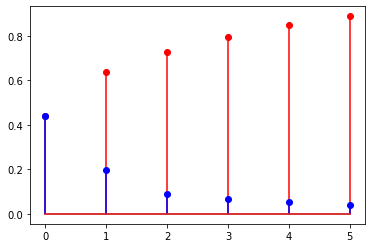

In [9]:
plt.stem(np.cumsum(pca.explained_variance_ratio_),'r')
plt.stem(pca.explained_variance_ratio_,'xb')
plt.show()